#Tujuan
Pada latihan ini, kita akan melakukan klasifikasi data yang kita miliki dengan teknik Decision Tree menggunakan dataset iris, salah satu dataset paling populer yang sering digunakan untuk belajar machine learning.



#Tahapan Latihan
1. Ubah dataset ke dalam dataframe.
2. Hapus kolom 'Id' pada dataframe serta pisahkan antara atribut dan label. 
3. Bagi dataset menjadi data latih dan data uji.
4. Buat dan latih model Decision Tree.
5. Lakukan pengujian model dengan menggunakan data uji. 
6. Lakukan prediksi dengan model yang telah dilatih.
7. Visualisasi model Decision Tree yang telah dilatih.

Pertama kita akan mengimpor library yang dibutuhkan dan mempersiapkan dataset. Dataset dapat anda unduh di [tautan](https://www.kaggle.com/uciml/iris) berikut. Setelah data diunduh, masukkan berkas Iris.csv ke dalam Google Colab. Lalu jangan lupa konversi dataset menjadi Pandas dataframe.

##1. Ubah dataset ke dalam dataframe.

In [ ]:
import pandas as pd
 
# Membaca file iris.csv
# load data from google drive
import pandas as pd
URL ='https://drive.google.com/file/d/1KxHfRXe_3msvYfkOEcV2OtSZzEIM2qgM/view?usp=sharing'
data = 'https://drive.google.com/uc?export=download&id='+URL.split('/')[-2]
iris = pd.read_csv(data,delimiter=',')

Untuk melihat informasi mengenai data, gunakan fungsi info(). Selain itu, Anda juga bisa melihat lima data teratas pada dataset menggunakan fungsi head(). 

In [ ]:
# Melihat informasi dataset
iris.info()
 
# melihat informasi dataset pada 5 baris pertama
iris.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


##2. Hapus kolom 'Id' pada dataframe serta pisahkan antara atribut dan label.

Dari output di atas, kita dapat mengidentifikasi kolom yang tidak penting pada dataset yaitu kolom "Id". Untuk menghilangkan kolom tersebut, gunakan fungsi drop().

In [ ]:
# menghilangkan kolom yang tidak penting
iris.drop('Id',axis=1,inplace=True)

##3. Bagi dataset menjadi data latih dan data uji.

Sebelum melatih model kita perlu memisahkan atribut dengan label. Selain itu, kita juga perlu membagi dataset menjadi data latih dan data uji.

In [ ]:
# memisahkan atribut dan label
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' ]]
y = iris['Species']
 
# Membagi dataset menjadi data latih & data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

##4. Buat dan latih model Decision Tree.

Selanjutnya, definisikan model decision tree yang akan kita gunakan. Kemudian,  latih model menggunakan data latih menggunakan fungsi fit().

In [ ]:
from sklearn.tree import DecisionTreeClassifier
 
# membuat model Decision Tree
tree_model = DecisionTreeClassifier() 
 
# Melatih model dengan menggunakan data latih
tree_model = tree_model.fit(X_train, y_train)

##5. Lakukan pengujian model dengan menggunakan data uji.

Setelah model dilatih, uji model menggunakan data uji untuk melihat seberapa baik model yang telah kita buat. Pengujian model ini bisa dilakukan dengan menggunakan fungsi predict(). 

In [ ]:
# Evaluasi Model
from sklearn.metrics import accuracy_score
 
y_pred = tree_model.predict(X_test)
 
acc_secore = round(accuracy_score(y_pred, y_test), 3)
 
print('Accuracy: ', acc_secore)

Accuracy:  0.933


Nah, kita bisa mencoba model yang telah kita buat untuk memprediksi spesies dari sebuah bunga Iris

##6.Lakukan prediksi dengan model yang telah dilatih.

Pada contoh berikut, kita ingin memprediksi spesies dari sebuah bunga iris  yang memiliki panjang sepal 6,2 centimeter, lebar sepal 3,4 centimeter, panjang petal 5,4 centimeter, dan lebar petal 2,3 centimeter.

In [ ]:
# prediksi model dengan tree_model.predict([[SepalLength, SepalWidth, PetalLength, PetalWidth]])
print(tree_model.predict([[6.2, 3.4, 5.4, 2.3]])[0])


Iris-virginica


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


##7. Visualisasi model Decision Tree yang telah dilatih.

Selain melakukan prediksi, kita juga bisa melihat visualisasi dari decision tree yang kita buat terhadap data menggunakan library Graphviz. Hasil dari graphviz adalah dot file

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_model,
    out_file = "iris_tree.dot",
    feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
    class_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica' ],
    rounded= True,
    filled =True)

Setelah kode di atas berhasil dijalankan, Anda akan mendapatkan output berupa berkas iris_tree.dot, sebagai berikut:

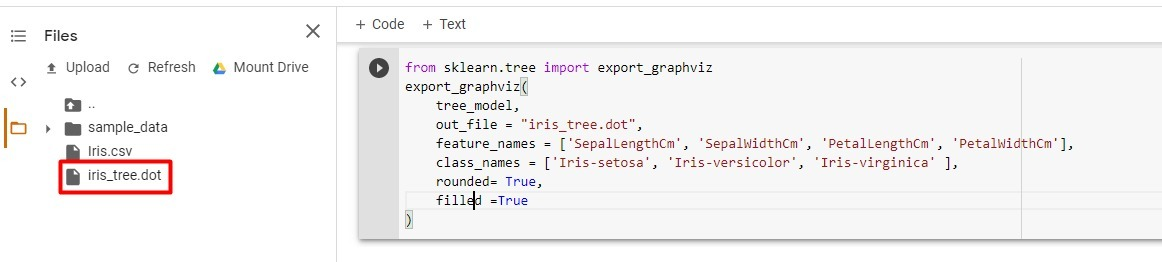

Untuk mengunduh berkas iris_tree.dot pada gambar di atas, kita dapat melakukan klik kanan pada berkas tersebut kemudian mengunduhnya.

Jika kita ingin melihat visualisasi decision tree, lakukan konversi dot file ke dalam file png menggunakan situs konversi berkas berikut ini : https://onlineconvertfree.com/converter/images/.

## Hasil Visualisasi Model Decision Tree sebagai berikut

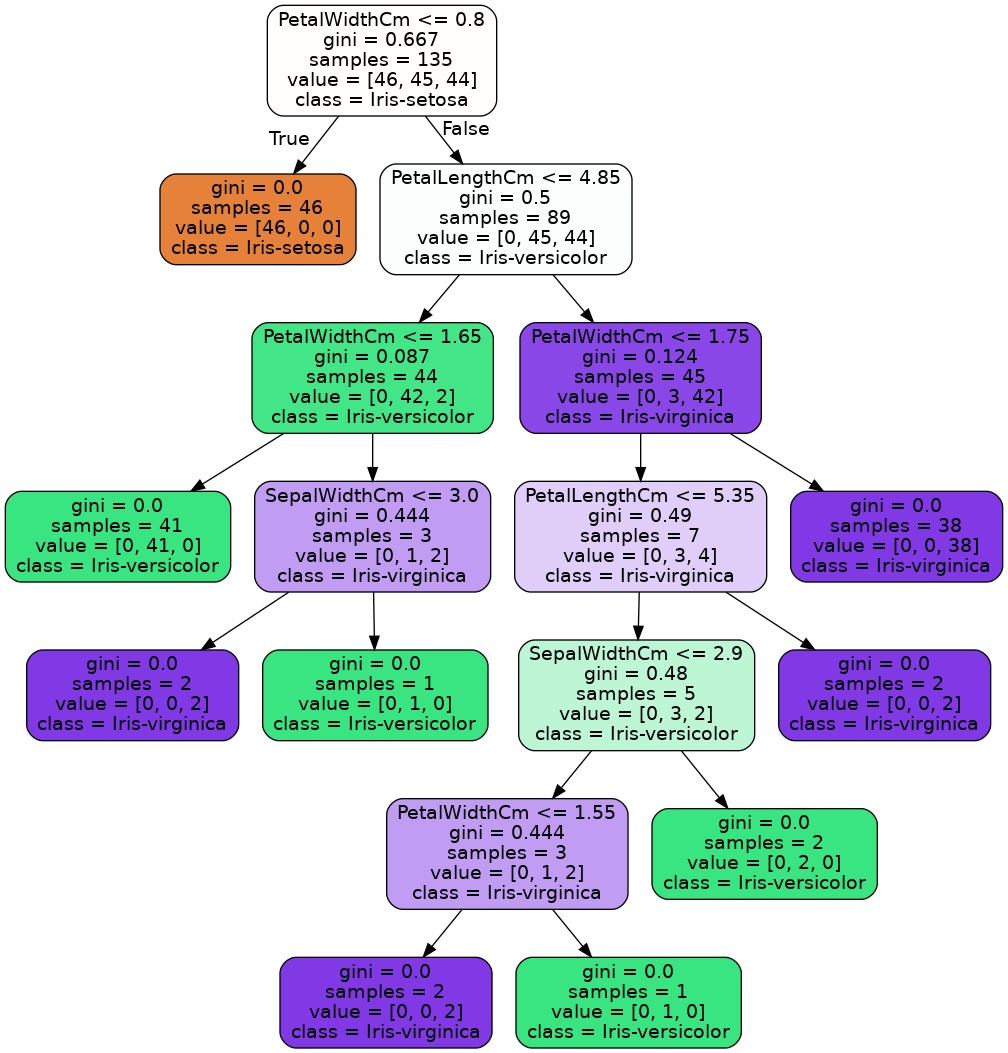